<a href="https://colab.research.google.com/github/njaunick/Project-2-Group-4/blob/nick/obesity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder

In [3]:
!pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

# data (as pandas dataframes)
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets

# metadata
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata)

# variable information
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables)


{'uci_id': 544, 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Tue Sep 10 2024', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'ID': 358, 'type': 

In [5]:
df = pd.concat([X, y], axis=1)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
df.shape

(2111, 17)

Dropping Null Values

In [7]:
# Dropping Null Values
df = df.dropna()
df.shape

(2111, 17)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [9]:
str_to_int = {
        'Male': 1,
        'Female': 0,
        'yes': 1,
        'no': 0,
        'Sometimes': 1,
        'Frequently': 2,
        'Always': 3,
        'Insufficient_Weight': 0,
        'Normal_Weight': 1,
        'Overweight_Level_I': 2,
        'Overweight_Level_II': 3,
        'Obesity_Type_I': 4,
        'Obesity_Type_II': 5,
        'Obesity_Type_III': 6,
        'Public_Transportation': 0,
        'Automobile': 1,
        'Motorbike': 2,
        'Bike': 3,
        'Walking': 4,
    }
     # Apply mapping to all relevant columns
df[df.columns] = df[df.columns].replace(str_to_int, regex=False)
df.head(20)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,4,2
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,3


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int64  
 12  FAF                             21

In [11]:
# Split into features and target
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

In [12]:
y.value_counts()

,count
NObeyesdad,
4,351
6,324
5,297
2,290
3,290
1,287
0,272


In [13]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
print("NaN values in target variable:", df['NObeyesdad'].isna().sum())

NaN values in target variable: 0


Logistic Regression

In [15]:
# Logistic Regression Model
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
accuracy = lr.score(X_test, y_test)
print("\nModel Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model Accuracy: 0.6808510638297872

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        56
           1       0.64      0.58      0.61        62
           2       0.52      0.59      0.55        56
           3       0.44      0.38      0.41        50
           4       0.67      0.49      0.56        78
           5       0.74      0.90      0.81        58
           6       0.84      1.00      0.91        63

    accuracy                           0.68       423
   macro avg       0.67      0.68      0.67       423
weighted avg       0.67      0.68      0.67       423


Confusion Matrix:
[[47  8  1  0  0  0  0]
 [11 36 11  1  2  0  1]
 [ 0  7 33 11  5  0  0]
 [ 0  5 12 19  9  4  1]
 [ 0  0  7 12 38 14  7]
 [ 0  0  0  0  3 52  3]
 [ 0  0  0  0  0  0 63]]


In [17]:
# Calculate feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(lr.coef_[0])
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Best model predictions
best_predictions = lr.predict(X_test)
print("\nBest Model Predictions (first 10):")
print(best_predictions[:10])


Feature Importance:
                           Feature  Importance
7                              NCP    2.672597
6                             FCVC    2.184956
8                             CAEC    1.503767
2                           Height    1.484956
12                             FAF    1.344052
10                            CH2O    1.273657
13                             TUE    1.132618
5                             FAVC    0.698845
0                           Gender    0.391519
3                           Weight    0.347724
14                            CALC    0.210757
4   family_history_with_overweight    0.124339
15                          MTRANS    0.088108
9                            SMOKE    0.070304
11                             SCC    0.028913
1                              Age    0.023288

Best Model Predictions (first 10):
[0 6 0 1 1 0 5 3 4 0]


KNN model

k: 1, Train/Test Score: 1.000/0.894
k: 3, Train/Test Score: 0.940/0.891
k: 5, Train/Test Score: 0.914/0.879
k: 7, Train/Test Score: 0.892/0.858
k: 9, Train/Test Score: 0.871/0.851
k: 11, Train/Test Score: 0.852/0.825
k: 13, Train/Test Score: 0.839/0.809
k: 15, Train/Test Score: 0.822/0.801
k: 17, Train/Test Score: 0.814/0.794
k: 19, Train/Test Score: 0.812/0.792


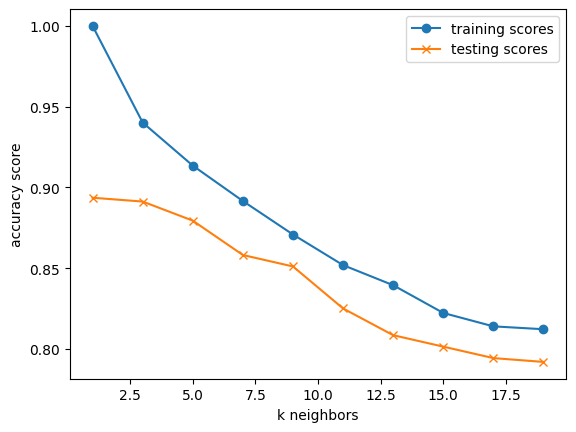

In [18]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

# Plot the results
plt.plot(range(1, 20, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [19]:
# Choose the best k, and refit the KNN classifier by using that k value.
# Note that k: 9 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

# Print the score for the test data.
print('k=9 Test Acc: %.3f' % knn.score(X_test, y_test))
# Print the score for the train data
print('k=9 Train Acc: %.3f' % knn.score(X_train, y_train))

k=9 Test Acc: 0.851
k=9 Train Acc: 0.871


Gradient Boosting Model

In [20]:
# Training the Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [21]:
# Evaluate the model
print("Test Accuracy:", gb.score(X_test, y_test))
print("Train Accuracy:", gb.score(X_train, y_train))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, gb.predict(X_test)))
print("ROC AUC Score:", roc_auc_score(y_test, gb.predict_proba(X_test), multi_class='ovr'))

Test Accuracy: 0.9432624113475178
Train Accuracy: 0.9970379146919431
Balanced Accuracy: 0.9424251785081278
ROC AUC Score: 0.9956303000605571


Adaptive Boosting Classifier

In [22]:
# Training the Adaptive Boosting Classifier
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=1)

In [23]:
# Evaluate the model
print("Test Accuracy:", abc.score(X_test, y_test))
print("Train Accuracy:", abc.score(X_train, y_train))

Test Accuracy: 0.2695035460992908
Train Accuracy: 0.283175355450237


Decision Tree Classifier

In [24]:
# Train a Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
# Evaluate the model
print("Test Accuracy:", dtc.score(X_test, y_test))
print("Train Accuracy:", dtc.score(X_train, y_train))

Test Accuracy: 0.9479905437352246
Train Accuracy: 1.0


Random Forest Classifier

In [38]:
# Train a Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
# Evaluate the model
print("Test Accuracy:", rfc.score(X_test, y_test))
print("Train Accuracy:", rfc.score(X_train, y_train))

Test Accuracy: 0.9550827423167849
Train Accuracy: 1.0


Extra Trees

In [30]:
# Train an Extra Trees Model
etc = ExtraTreesClassifier(random_state=1)
etc.fit(X_train, y_train)

ExtraTreesClassifier(random_state=1)

In [31]:
# Evaluate the model
print("Test Accuracy:", etc.score(X_test, y_test))
print("Train Accuracy:", etc.score(X_train, y_train))

Test Accuracy: 0.9456264775413712
Train Accuracy: 1.0


Support Vector Machine

In [32]:
# Train a SVM
svm = SVC(random_state=0, kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [33]:
# Evaluate the model
print("Test Accuracy:", svm.score(X_test, y_test))
print("Train Accuracy:", svm.score(X_train, y_train))

Test Accuracy: 0.8888888888888888
Train Accuracy: 0.9022511848341233


HyperPrameter Tuning of Random Forest Classifier

In [37]:
# Hyperparameter tuning Random Forest
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create a base model
#rfc = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Get the best model
best_rfc = grid_search.best_estimator_

# Evaluate the best model
print("Test Accuracy:", best_rfc.score(X_test, y_test))
print("Train Accuracy:", best_rfc.score(X_train, y_train))

# Print the classification report
y_pred = best_rfc.predict(X_test)
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

Best parameters found:  {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Test Accuracy: 0.9550827423167849
Train Accuracy: 1.0
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        56
           1       0.88      0.92      0.90        62
           2       0.94      0.88      0.91        56
           3       0.94      0.98      0.96        50
           4       0.97      0.96      0.97        78
           5       0.97      0.98      0.97        58
           6       1.00      1.00      1.00        63

    accuracy                           0.96       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.96      0.96      0.96       423

Confusion Matrix:
[[54  2  0  0  0  0  0]
 [ 1 57  3  1  0  0  0]
 [ 0  6 49  1  0  0  0]
 [ 0  0  0 49  1  0  0]
 [ 0  0  0  1 75  2  0]
 [ 0  0  0  0  1 57  0]
 [ 0  0  0  0  0  0 63]]


In [40]:
# Define the parameter distributions
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=500, num=5)],
    'max_depth': [None] + list(range(5, 30, 5)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a base model
#rfc = RandomForestClassifier(random_state=42)

# Instantiate the randomized search model
random_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_dist,
                                   n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the randomized search to the data
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

# Get the best model
best_rfc = random_search.best_estimator_

# Evaluate the best model
print("\nBest Model Performance:")
print("Test Accuracy:", best_rfc.score(X_test, y_test))

# Make predictions
y_pred = best_rfc.predict(X_test)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
150 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
77 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils

Best parameters found:  {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 25}
Best cross-validation score:  0.9561620985725071

Best Model Performance:
Test Accuracy: 0.9550827423167849

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        56
           1       0.88      0.92      0.90        62
           2       0.88      0.88      0.88        56
           3       0.98      0.98      0.98        50
           4       0.99      0.96      0.97        78
           5       0.97      0.98      0.97        58
           6       1.00      1.00      1.00        63

    accuracy                           0.96       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.96      0.96      0.96       423


Confusion Matrix:
[[54  2  0  0  0  0  0]
 [ 0 57  5  0  0  0  0]
 [ 0  6 49  1  0  0  0]
 [ 0  0  1 49  0  0  0]
 [ 0  0  1  0 75  2  0